In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


marketing = pd.read_csv('./marketing_clean.csv',parse_dates=['date_served','date_subscribed','date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0


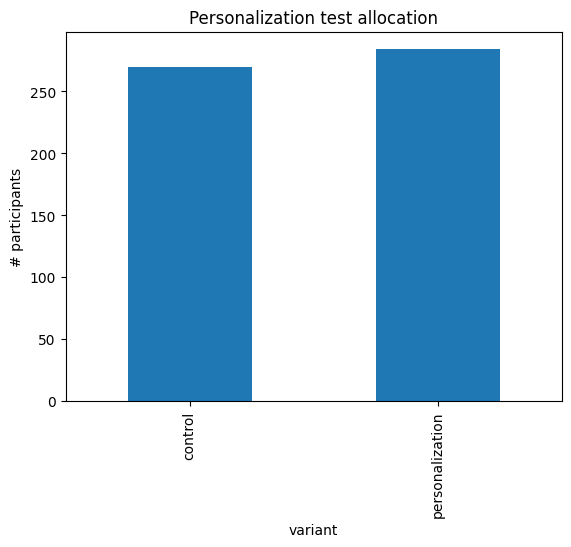

In [2]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']


# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = "bar")
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [3]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [4]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [9]:
import scipy.stats as stats
# stats.ttest_ind(control, personalization)

In [22]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()
      control = pd.to_numeric(control)
      personalization = pd.to_numeric(personalization)
      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')
      

In [23]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: TtestResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001, df=8.0) 


English
lift: 39.0%
t-statistic: TtestResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503, df=486.0) 


German
lift: -1.62%
t-statistic: TtestResult(statistic=0.19100834180787182, pvalue=0.8494394170062677, df=42.0) 


Spanish
lift: 166.67%
t-statistic: TtestResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524, df=10.0) 




c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: TtestResult(statistic=-2.966044912142212, pvalue=0.003872449439129706, df=89.0) 


19-24 years
lift: 106.24%
t-statistic: TtestResult(statistic=-3.0317943847866697, pvalue=0.00306238361146892, df=105.0) 


24-30 years
lift: 161.19%
t-statistic: TtestResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335, df=114.0) 


30-36 years
lift: -100.0%
t-statistic: TtestResult(statistic=3.185906464414798, pvalue=0.0023238487431765337, df=58.0) 


36-45 years
lift: -85.23%
t-statistic: TtestResult(statistic=2.431790127931851, pvalue=0.017975686009788258, df=61.0) 


45-55 years
lift: -72.22%
t-statistic: TtestResult(statistic=2.0654991273179326, pvalue=0.04306233968820123, df=62.0) 


55+ years
lift: -100.0%
t-statistic: TtestResult(statistic=3.326565456420339, pvalue=0.0016358623456360468, df=51.0) 


